10


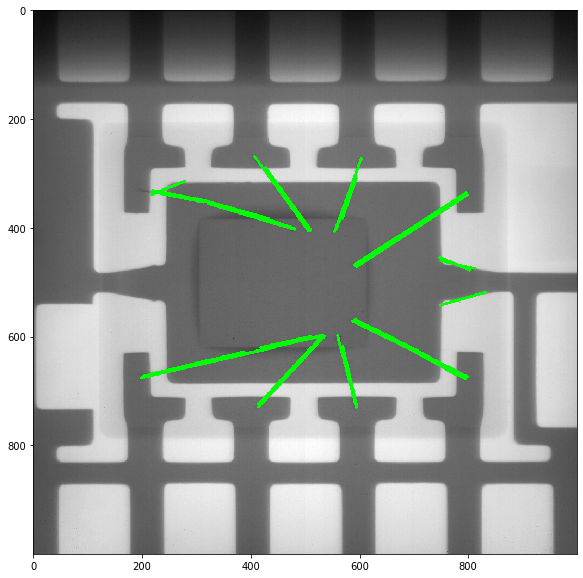

In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
img = cv2.imread('WS06.jpg')
img0 = img*4
gray = cv2.cvtColor(img0,cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)
kernel = np.array([[-1,-1,-1], [-1,9,-1], [-1,-1,-1]])
gray = cv2.filter2D(blur_gray, -1, kernel)
edges = cv2.Canny(blur_gray,50,150,apertureSize = 3)
rho = 0.5 
theta = np.pi / 180 
threshold = 15
min_line_length = 50 
max_line_gap = 20  
output = np.copy(img)
count = 0
lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]),
                    min_line_length, max_line_gap)

for line in lines:
    for x1,y1,x2,y2 in line:
        if abs(x1-x2)>5 and abs(y1-y2)>5:
            if ((x1>gray.shape[0]*.25 and x1 < gray.shape[0]*.75) or (x2>gray.shape[0]*.25 and x2 < gray.shape[0]*.75)):
                if ((y1 >gray.shape[0]*.25 and y1 < gray.shape[1]*.75))or(y2 >gray.shape[0]*.25 and y2 < gray.shape[1]*.75):
                    cv2.line(output,(x1,y1),(x2,y2),(0,255,2),3)
                    count += 1
fig, ax = plt.subplots(figsize=(20, 10))
ax.imshow(output)
print(count//4)